# This Script Contains:
### 1. Import of Libraries and Datasets
### 2. Exploring Relationships
##### Correlations
##### Scatterplots
##### Pair Plots
##### Categorical Plots
##### Answering research question: Which state sees the highest number of gun violence?   
##### Hypotheses

## 1. Import of Libraries and Datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Command to directly display charts in the notebook without 'call' command
%matplotlib inline

In [5]:
#Defining Path
path='/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset'

In [6]:
#Import data
df=pd.read_csv(os.path.join(path,'gun_violence_cleaned'))

In [7]:
df.shape

(67116, 21)

In [8]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [9]:
# Rename columns whose names are too long

df.rename(columns ={'city_or_county':'city/county','participant_age':'age', 'participant_age_group': 'age_group', 'participant_gender':'gender',
       'participant_status':'status', 'participant_type':'type'},inplace=True)

In [10]:
df.head()

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,latitude,longitude,n_guns_involved,age,age_group,gender,status,type,state_house_district,state_senate_district
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,35.0221,-85.2697,1.0,0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28.0,10.0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,38.7067,-90.2494,1.0,0::28,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76.0,4.0


In [11]:
df.dtypes

incident_id                   int64
date                         object
state                        object
city/county                  object
address                      object
n_killed                      int64
n_injured                     int64
congressional_district      float64
gun_stolen                   object
gun_type                     object
incident_characteristics     object
latitude                    float64
longitude                   float64
n_guns_involved             float64
age                          object
age_group                    object
gender                       object
status                       object
type                         object
state_house_district        float64
state_senate_district       float64
dtype: object

In [12]:
# Checking for mixed-type data
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_13423/4216365446.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_13423/4216365446.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_13423/4216365446.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_13423/4216365446.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/fol

In [13]:
# Removing rows where n_killed and n_injured values are zero
df_cleaned=df[(df['n_injured'] != 0) | (df['n_killed'] != 0)]

In [14]:
df_cleaned.shape

(45403, 21)

## 2. Exploring Relationships

### Correlations:

In [17]:
df_2= df_cleaned[['n_killed','n_injured','congressional_district','latitude','longitude','n_guns_involved','state_house_district','state_senate_district']]

In [18]:
df_2.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
0,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0
1,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0
2,5,0,1.0,34.9791,-106.7160,2.0,10.0,14.0
3,1,3,3.0,35.0221,-85.2697,1.0,28.0,10.0
4,1,3,1.0,38.7067,-90.2494,1.0,76.0,4.0


In [19]:
# Create a correlation matrix using pandas

df_2.corr()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
n_killed,1.000000,-0.290972,0.074185,-0.131520,-0.098901,0.039183,0.050256,0.041470
n_injured,-0.290972,1.000000,-0.037681,0.069152,0.069662,0.047106,-0.032611,-0.038182
congressional_district,0.074185,-0.037681,1.000000,-0.219813,-0.235981,0.005740,0.207056,0.350056
latitude,-0.131520,0.069152,-0.219813,1.000000,0.022839,-0.003834,-0.282374,-0.062234
longitude,-0.098901,0.069662,-0.235981,0.022839,1.000000,-0.011512,0.202374,0.088593
n_guns_involved,0.039183,0.047106,0.005740,-0.003834,-0.011512,1.000000,-0.003152,-0.008370
state_house_district,0.050256,-0.032611,0.207056,-0.282374,0.202374,-0.003152,1.000000,0.430235
state_senate_district,0.041470,-0.038182,0.350056,-0.062234,0.088593,-0.008370,0.430235,1.000000


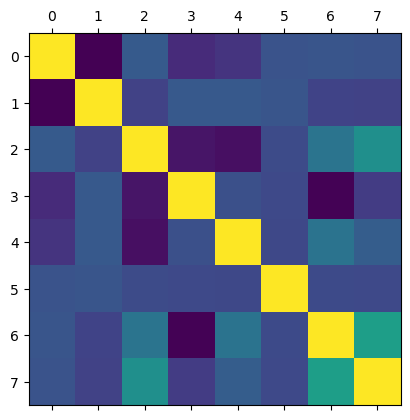

In [20]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

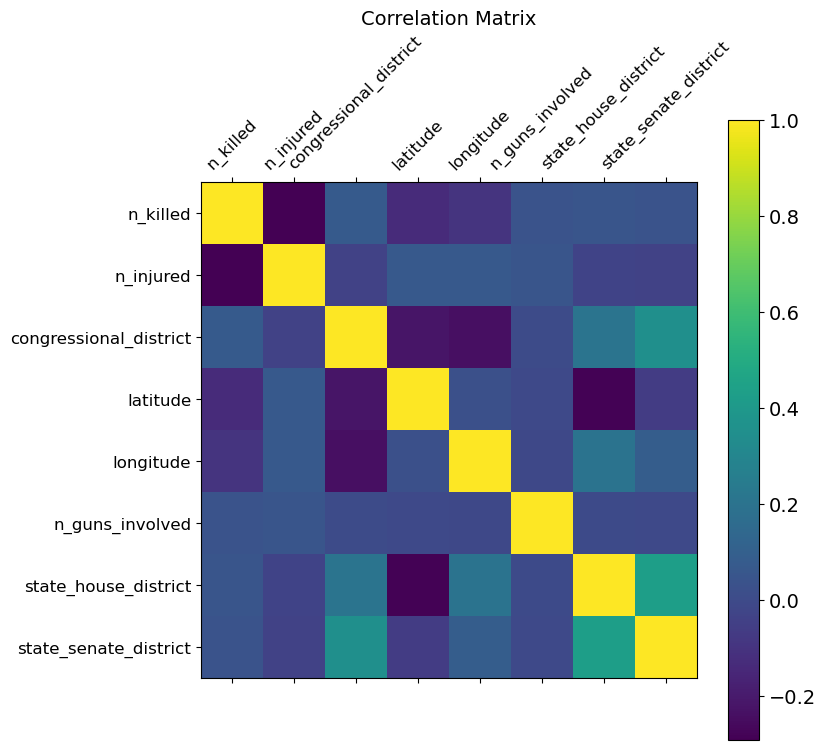

In [21]:
# Creating heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_2.shape[1]), df_2.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(df_2.shape[1]), df_2.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

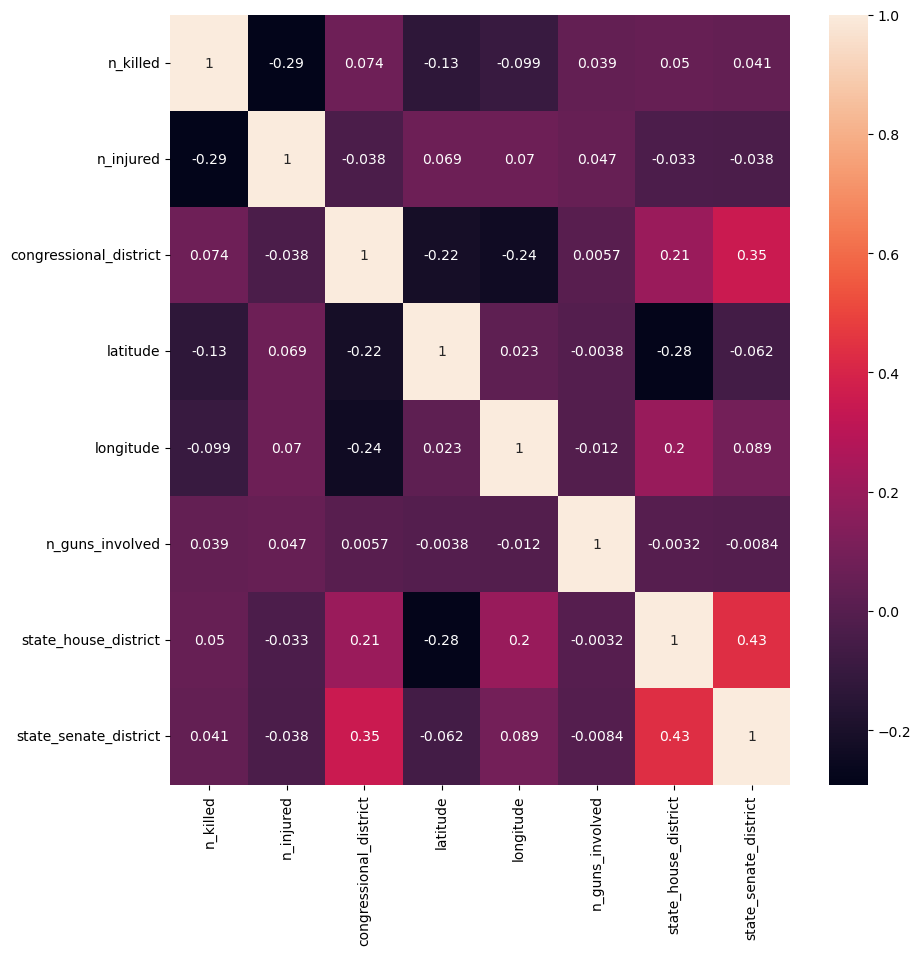

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_2.corr(), annot = True, ax = ax)

None of the variables have any stronger or moderate relationships

# Scatterplot

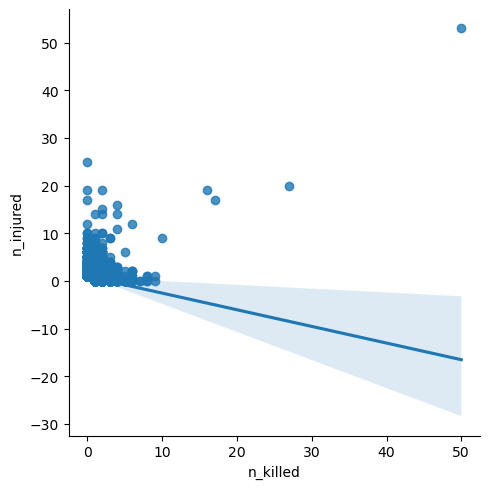

In [25]:
# Creating a scatterplot for the "n_killed" and "n_injured" columns in seaborn

sns.lmplot(x = 'n_killed', y = 'n_injured', data = df_2)

There is not a positive relation between the two variables

## Pair plots

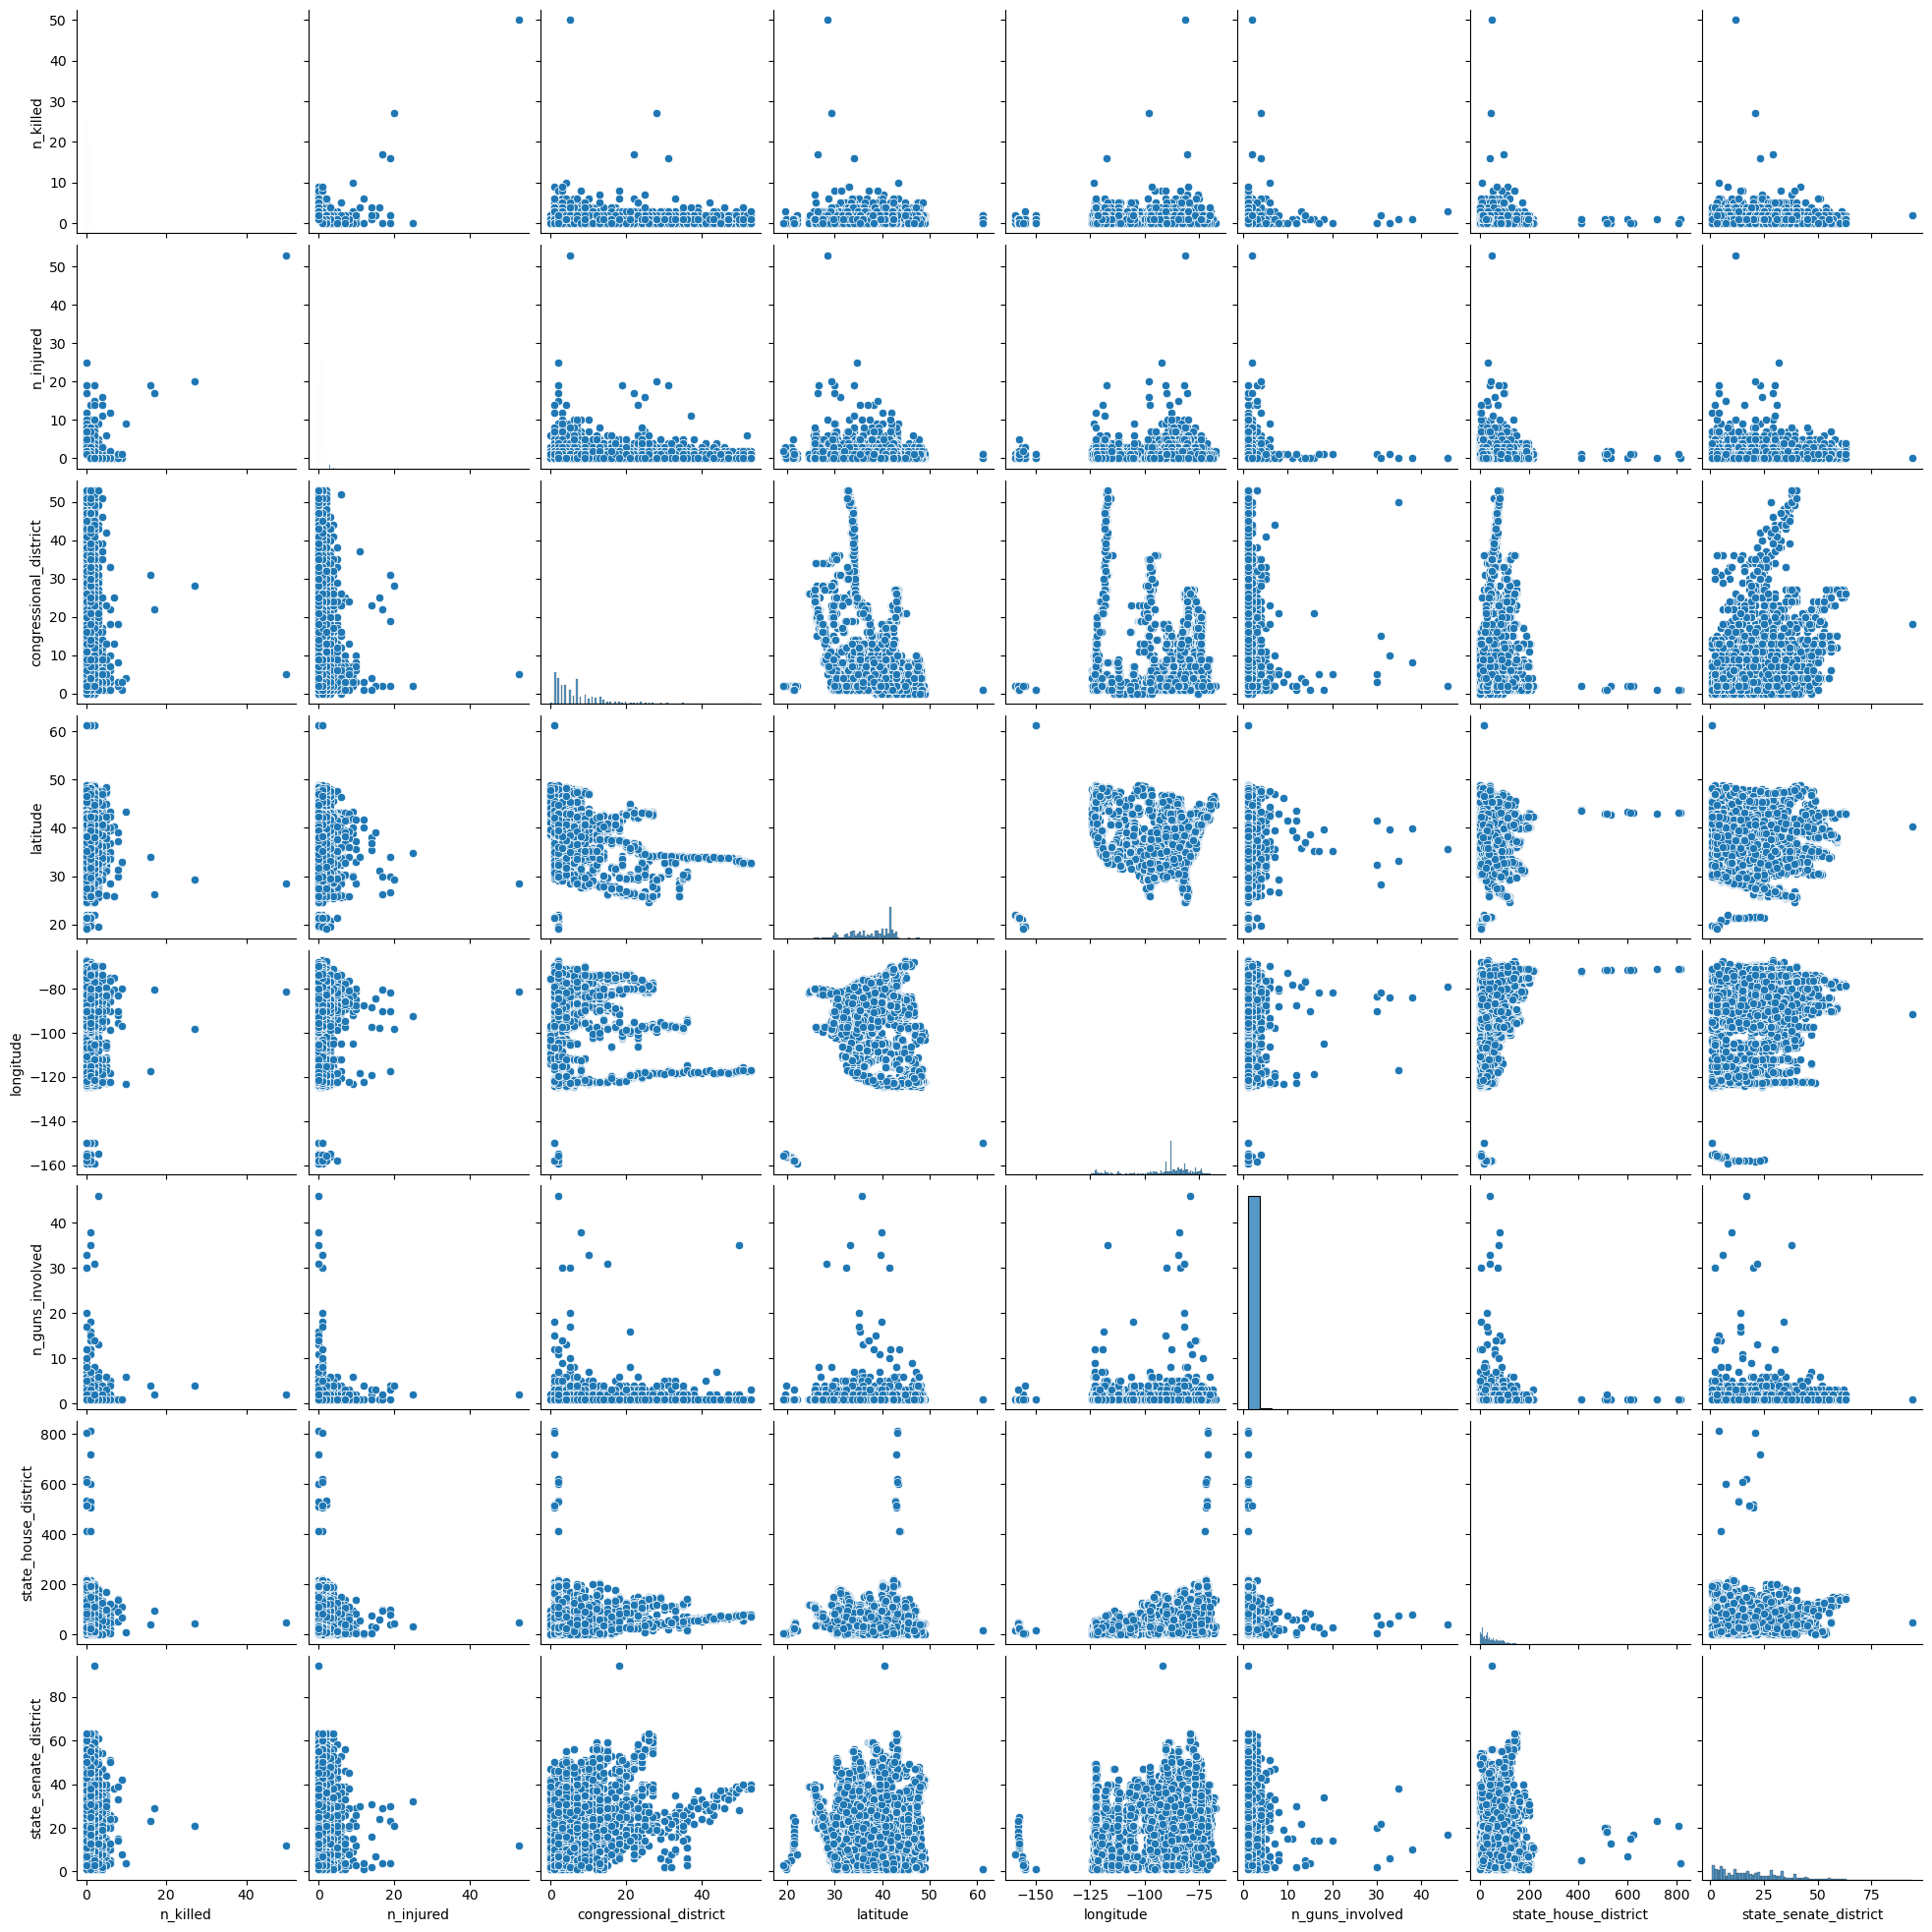

In [28]:
# Create a pair plot 

g = sns.pairplot(df_2)

## Categorical Plot

<Axes: xlabel='n_injured', ylabel='Count'>

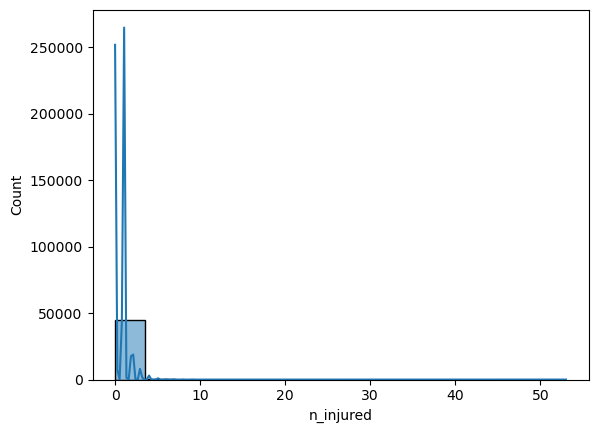

In [30]:
# Creating categorical plot of 'n_injured' column
sns.histplot(df_2['n_injured'], bins = 15, kde = True)

The most gun violence incidents, the number of people injured is under 10.

<Axes: xlabel='n_killed', ylabel='Count'>

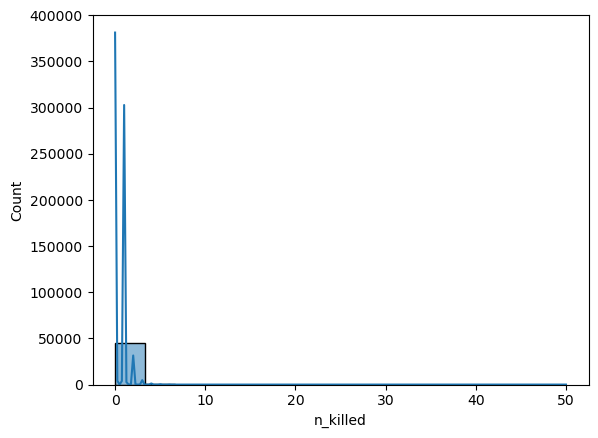

In [32]:
#Creating categorical plot of 'n_killed' column
sns.histplot(df_2['n_killed'], bins = 15, kde = True)

The most gun violence incidents, the number of people killed is under 10.

<Axes: xlabel='n_guns_involved', ylabel='Count'>

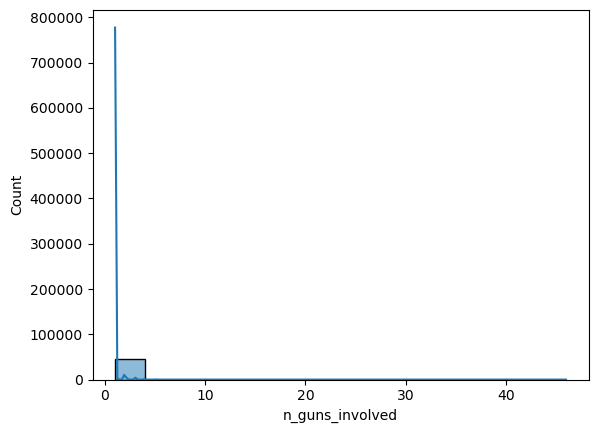

In [34]:
# #Creating histogram of 'n_guns_involved' column
sns.histplot(df_2['n_guns_involved'], bins = 15, kde = True)

In majority of the gun violence cases, only one firearm is typically involved.

In [36]:
df['n_guns_involved'].value_counts()

n_guns_involved
1.0      61003
2.0       3828
3.0       1003
4.0        408
5.0        190
         ...  
49.0         1
96.0         1
300.0        1
97.0         1
31.0         1
Name: count, Length: 74, dtype: int64

In [37]:
# Creating Category of n_killed
df.loc[df['n_killed']== 0, 'Death_category'] = 'No death'
df.loc[(df['n_killed'] >= 1) & (df['n_killed'] <= 5), 'Death_category'] = 'Low-death count'
df.loc[(df['n_killed'] > 5) & (df['n_killed'] <= 20), 'Death_category'] = 'Moderate-death count'
df.loc[df['n_killed'] >20, 'Death_category'] = 'High-death count'

In [38]:
df['Death_category'].value_counts()

Death_category
No death                45646
Low-death count         21447
Moderate-death count       21
High-death count            2
Name: count, dtype: int64

In [39]:
# checking for new columns
df.columns

Index(['incident_id', 'date', 'state', 'city/county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'age', 'age_group', 'gender', 'status', 'type', 'state_house_district',
       'state_senate_district', 'Death_category'],
      dtype='object')

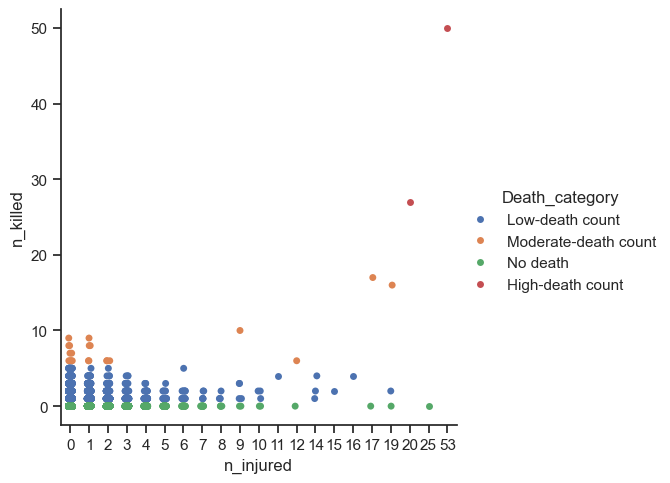

In [40]:
# Create a categorical plot in seaborn using the death categories created above

sns.set(style="ticks")
g = sns.catplot(x="n_injured", y="n_killed", hue="Death_category", data=df)

The categorical plot on death category shows the following observations:
1. High death count also results in high injuries.
2. Low injuries doesnot necessarily comply that the incident recorded no fatalities. In some cases, a low injury count might indicate a more severe incident with a high fatality rate.

### Answering research questions: Which state sees highest number of gun violence?

Text(0.5, 1.0, 'U.S.A')

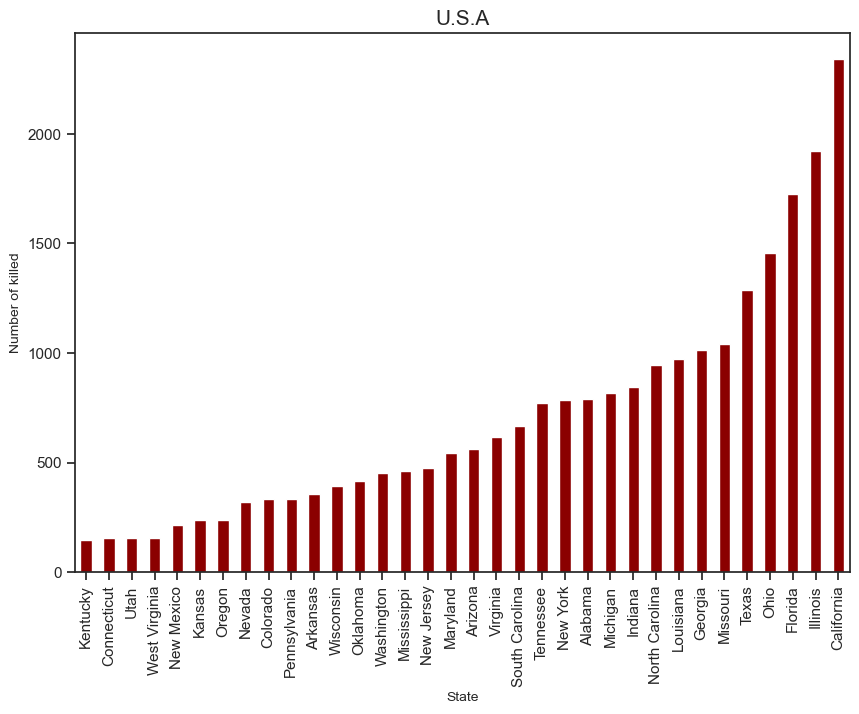

In [43]:
# Which state sees the highest number of deaths from gun violence?
df.groupby('state').n_killed.sum().sort_values()[15:].plot(kind='bar', color='darkred', figsize=(10,7))
plt.ylabel('Number of killed', fontsize=10)
plt.xlabel('State', fontsize=10)
plt.title('U.S.A', fontsize=15)

California has seen the highest number of deaths from gun violence. The state is followed by Illinois and Florida. 

Text(0.5, 1.0, 'U.S.A')

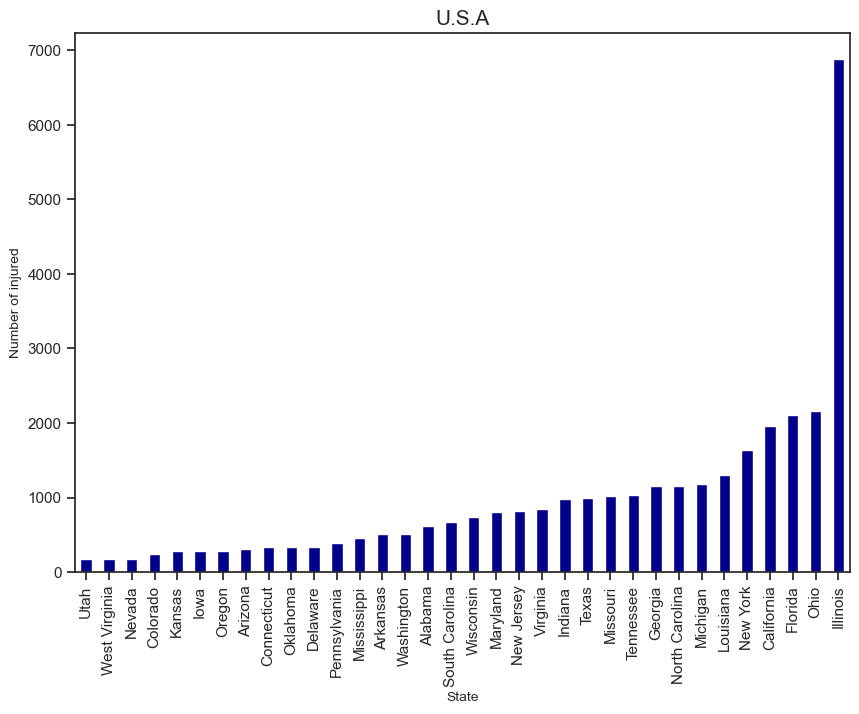

In [45]:
# Which state sees the highest number of injury from gun violence?
df.groupby('state').n_injured.sum().sort_values()[15:].plot(kind='bar', color='darkblue', figsize=(10,7))
plt.ylabel('Number of injured', fontsize=10)
plt.xlabel('State', fontsize=10)
plt.title('U.S.A', fontsize=15)

Illinois has seen the highest number of injuries from gun violence, and is followed by Ohio, Florida and California.

#### Hypotheses

At this stage my hypotheses are :
1. High death count also results in high injuries.
2. Low injured doesnot necessarily comply that the incident recorded no fatalities. 

In [49]:
#Export data
df_cleaned.to_csv('gun_violence_wrangled',index=False)